In [2]:
import requests
import pandas as pd 
import json 
import matplotlib.pyplot as plt
from functools import reduce

## 1 Data Wrangling


## Gather :

### Data obtained from Twitter API was done in other software and code i provided below:

import tweepy
import pandas as pd
import json
import requests


auth = tweepy.OAuthHandler(api_key, api_secrety)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


df_original = pd.read_csv('/Users/katerynaisaieva/Desktop/Nanodegree_Projects/Project4/Twitter_api_dogs_and_tails/twitter-archive-enhanced.csv')
df_tweets = df_original.tweet_id#.head(20)

data = {}
data['scraped_data'] = []

for id in df_tweets:
    try:
 
        tweet = api.get_status(id,tweet_mode='extended')
        print(tweet)
        data['scraped_data'].append({
            'tweet_id': id,
            'retweet_count': tweet.retweet_count,
            'likes': tweet.favorite_count
         })
        print(data)
    except Exception as e:
        print('error')

print(data)

with open('tweet_json.txt', 'w') as outfile:
    json.dump(data, outfile)


if __name__ == "__main__":
    print('my first API')


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url, allow_redirects=True)



In [4]:
open('image-predictions-3.tsv', 'wb').write(r.content)


335079

In [5]:
df_predictions = pd.read_csv('image-predictions-3.tsv',sep='\t')
df_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [6]:
df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [7]:
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    df_tweets_data = pd.DataFrame(data['scraped_data'])
        
df_tweets_data.head(2)      

,likes,retweet_count,tweet_id
0,34593,7207,892420643555336193
1,29991,5409,892177421306343426


In [8]:
cols = ['tweet_id','retweet_count','likes']
df_tweets_data = df_tweets_data[cols]
df_tweets_data.head(2)

,tweet_id,retweet_count,likes
0,892420643555336193,7207,34593
1,892177421306343426,5409,29991


## Assess :
#### at least eight (8) quality issues and two (2) tidiness issues:

tweets-data table:

In [9]:
# df_tweets_data

In [10]:
df_tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
tweet_id         1680 non-null int64
retweet_count    1680 non-null int64
likes            1680 non-null int64
dtypes: int64(3)
memory usage: 39.5 KB


In [11]:
df_tweets_data.sample(10)

,tweet_id,retweet_count,likes
436,818588835076603904,5839,0
1644,672828477930868736,438,1135
1244,686749460672679938,1359,3293
1213,688828561667567616,342,1308
1138,693280720173801472,1169,3182
1543,674788554665512960,188,740
695,784057939640352768,10655,28840
1535,675015141583413248,1080,2495
1374,680191257256136705,467,2033
494,811744202451197953,1531,7345


In [12]:
df_tweets_data[df_tweets_data.duplicated()]

,tweet_id,retweet_count,likes


In [13]:
df_tweets_data.duplicated() is True  

False

In [14]:
# df_tweets_data.tweet_id.value_counts()

### tweets data table:

=> looks clean and tidy

In [15]:
df_tweets.columns 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
df_tweets.duplicated() is True 

False

In [17]:
# df_tweets

In [18]:
df_tweets.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1302,707610948723478529,NaN,NaN,2016-03-09 16:56:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harper. She scraped her elbow attempti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707610948...,12,10,Harper,None,None,None,None
1925,674063288070742018,NaN,NaN,2015-12-08 03:09:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. Earl is lost. Someone help Earl....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674063288...,5,10,Earl,None,None,None,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
1936,673956914389192708,NaN,NaN,2015-12-07 20:07:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is one esteemed pupper. Just graduated co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673956914...,10,10,one,None,None,pupper,None
645,793165685325201412,NaN,NaN,2016-10-31 19:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Benji. He's Air Bud. It's a low effort...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793165685...,12,10,Benji,None,None,None,None
368,828708714936930305,NaN,NaN,2017-02-06 20:55:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fiona. She's an exotic dog. Seems rath...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828708714...,10,10,Fiona,None,None,None,None


In [19]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
df_tweets[df_tweets.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [21]:
#df_tweets.isnull()

### tweets table



columns:
<br>quality issues:
- name: some names are not defined and consist of eather None or 1-2 letters articles (a,an,the ..) or random word(such,..) and object type instead of a string type
- name:  has None values which are not recognized as missing values
- name: some Names are missing
- doggo,floofer,pupper,puppo: includes None 
- timestamp: object type instead of date type
- source: object type instead of string type
- text: object type instead of string type
- retweeted_status_timestamp: object type instead of date type
- number of columns has missing values
- source: consists of unnessasery  info

<br> tidiness issues:

-  Information about one type of observational unit (tweets) is spread across three different files/dataframes, should e one dataframe. 
- satges of the dog spread out to 4 columns, it should be rather one column

In [22]:
df_predictions.columns 

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [23]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
df_predictions.duplicated() is True 

False

In [25]:
# df_predictions.tweet_id.value_counts() 

In [26]:
# df_predictions

In [27]:
df_predictions[df_predictions.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Prediction table:

columns:

Quality issues:
- p1,p2,p3: object type  instead of string type


## Clean :

## tweets table cleaning

## Define 


- name: Lets remove/replace with ""  some names which are not defined and consist of ether None or 1-2 letters articles (a,an,the ..) or random word(such,..) and those which are missing 

- doggo,floofer,pupper,puppo: lets replace  None values with ""
- timestamp: Changing object type to date type
- source: changing object type to string type
- text: Changing object type to string type
- retweeted_status_timestamp: Changing object type to date type
- lets replace  missing values None with NaN , which will be recognizable by Panda as missing values
- source: Lets remove  unnessasery  info

<br> tidiness issues:

-  Information about one type of observational unit (tweets) is spread across three different files/dataframes, should e one dataframe. => Lets merge 3 datasets in one on tweet_id unite 
- stages of the dog spread out to 4 columns, lets combine those in one column

## Code

In [28]:
df_tweets_clean = df_tweets.copy()

In [29]:
df_tweets_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### Define 1. Separating the source - Lets remove  unnessasery  info: 

### Code 

In [30]:
df_tweets_clean.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [31]:
df_tweets_clean.expanded_urls[1]

'https://twitter.com/dog_rates/status/892177421306343426/photo/1'

In [32]:
df_tweets_clean.source = df_tweets_clean.source.str[9:]
size = len(df_tweets_clean.source)
df_tweets_clean.source = df_tweets_clean.source.str[:size-24]
df_tweets_clean.source[2]

'http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [33]:
df_tweets_clean.source.value_counts()

http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [34]:

for row in range(len(df_tweets_clean.source)):
    if df_tweets_clean.source[row].find('Twitter for iPhone'):
        df_tweets_clean.source = 'Twitter for iPhone'
    if df_tweets_clean.source[row].find('Vine'):
          df_tweets_clean.source = 'Vine'
    if df_tweets_clean.source[row].find('Web'):
        df_tweets_clean.source = 'Web'
    if df_tweets_clean.source[row].find('TweetDeck'):
         df_tweets_clean.source = 'TweetDeck'
   

## Test 

In [35]:
df_tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,TweetDeck,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,TweetDeck,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,TweetDeck,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,TweetDeck,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,TweetDeck,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,TweetDeck,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,TweetDeck,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,TweetDeck,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,TweetDeck,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,TweetDeck,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Define 2.  changing data type of column 'name' and 'text' to str:

### Code 

In [36]:
df_tweets_clean['text'] = df_tweets_clean['text'].astype(str,errors='raise')

In [37]:
df_tweets_clean['name'] = df_tweets_clean['name'].astype(str)

### Test

In [38]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

###  Define 3. Lets remove/replace with ""  some names which are not defined and consist of ether None or 1-2 letters articles (a,an,the ..) or random word(such,..) and then  those which are missing  or empty replace with readable NaN :

### Code

In [39]:
my_list = ['a','an','the','such','quite']
a = []
for row in range(len(df_tweets_clean)):
    for i in my_list:
        if df_tweets_clean['name'][row] ==  i: 
            df_tweets_clean.replace(to_replace =df_tweets_clean['name'][row],value = '' ,inplace=True)
            

In [40]:
df_tweets_clean.name.fillna(value=pd.np.nan,inplace=True)

In [41]:
df_tweets_clean['name'] = df_tweets_clean.name.replace(to_replace = ['None',''],value = np.nan)

### Test

In [42]:
df_tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,TweetDeck,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,TweetDeck,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,TweetDeck,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,TweetDeck,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,TweetDeck,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,TweetDeck,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,TweetDeck,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,TweetDeck,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,TweetDeck,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,TweetDeck,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


### Define 4. changing data type of columns 'timestamp'  and 'retweet_status_timestamp' to datetime:

### Code

In [43]:
df_tweets_clean['timestamp'] = df_tweets_clean['timestamp'].astype('datetime64',errors='raise')

In [44]:
df_tweets_clean['retweeted_status_timestamp'] = df_tweets_clean['retweeted_status_timestamp'].astype('datetime64',errors='raise')

### Test 

In [45]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1536 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Define 5. stages of the dog spread out to 4 columns, lets combine those in one column replacing "None" values with '' and combining all 4 columns in one :

### Code

In [46]:
# replace None in stage columns with empty string as follows.
df_tweets_clean.doggo.replace('None', '', inplace=True) 
df_tweets_clean.floofer.replace('None', '', inplace=True)
df_tweets_clean.pupper.replace('None', '', inplace=True)
df_tweets_clean.puppo.replace('None', '', inplace=True)

# combine stage columns.
df_tweets_clean['stage'] = df_tweets_clean.doggo + df_tweets_clean.floofer + df_tweets_clean.pupper + df_tweets_clean.puppo



In [47]:
# Then format entries with multiple dog stages which appeared like doggopupper.
df_tweets_clean.loc[df_tweets_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df_tweets_clean.loc[df_tweets_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df_tweets_clean.loc[df_tweets_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

### test 

In [48]:
df_tweets_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,TweetDeck,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,TweetDeck,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,TweetDeck,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,TweetDeck,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,TweetDeck,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,TweetDeck,Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,TweetDeck,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,TweetDeck,When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,TweetDeck,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,TweetDeck,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo


### Define 6. lets in column text  keep only text and remove links:

### Code

In [49]:
df_tweets_clean.iloc[9].text

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A'

In [50]:
df_tweets_clean['text'] = df_tweets_clean.text.str.split('https').str[0]

### Test

In [51]:
df_tweets_clean.iloc[9].text

'This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate '

In [52]:
df_tweets_clean.text.sample(10)

2238    This is Alfie. He's that one hypocritical gym ...
262     Meet Indie. She's not a fan of baths but she's...
2130    This is Wally. He's a Flaccid Mitochondria. Go...
1275    This is Sammy. He's in a tree. Very excited ab...
79      This is Penny. She's both pupset and fired pup...
1525    This is Eriq. His friend just reminded him of ...
2276    Exotic dog here. Long neck. Weird paws. Obsess...
499     Here's an anonymous doggo that appears to be v...
1424    This is Doug. He's a Draconian Jabbawockee. Ra...
254     This is Charlie. He wants to know if you have ...
Name: text, dtype: object

### Define 7 :  also lets separating only days  from timestamp and changing obj type pf created_date column to datetime type:

### Code 

In [53]:
df_tweets_clean['created_date'] = df_tweets_clean['timestamp'].astype('str').str[:10]

In [54]:
df_tweets_clean['created_date'] = df_tweets_clean['created_date'].astype('datetime64',error='raise')

### Test 

In [55]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1536 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage           

### Define 8 . removing retweets (RT @):

### Code

In [56]:
df_tweets_clean = df_tweets_clean[df_tweets_clean.text.str[:4] !=  'RT @']

### Test 

In [57]:
df_tweets_clean[df_tweets_clean.text.str[:4] == 'RT @'] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,created_date


 ## df_predictions table cleaning

### Define: no issues found

### Code/Test 

In [58]:
df_predictions_clean = df_predictions.copy()

In [59]:
df_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1741,822610361945911296,https://pbs.twimg.com/media/C2p_wQyXEAELtvS.jpg,1,cocker_spaniel,0.664487,True,Norfolk_terrier,0.075089,True,Norwich_terrier,0.059644,True
1558,793241302385262592,https://pbs.twimg.com/media/CwIougTWcAAMLyq.jpg,1,golden_retriever,0.559308,True,Labrador_retriever,0.390222,True,cocker_spaniel,0.036316,True
63,667165590075940865,https://pbs.twimg.com/media/CUI_kHBWsAAAef5.jpg,1,miniature_pinscher,0.140173,True,Rottweiler,0.134094,True,beagle,0.081900,True
1185,738885046782832640,https://pbs.twimg.com/media/CkEMBz9WYAAGLaa.jpg,1,bath_towel,0.878320,False,swab,0.020633,False,American_Staffordshire_terrier,0.015535,True
1796,831322785565769729,https://pbs.twimg.com/media/C4lzqQ4UEAApzU0.jpg,1,Old_English_sheepdog,0.999715,True,Tibetan_terrier,0.000046,True,guinea_pig,0.000041,False


In [60]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB



## df_tweets_data DataFrame

### Define: no issues found

### Code/Test

In [61]:
df_tweets_data_clean = df_tweets_data.copy()

In [62]:
df_tweets_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 3 columns):
tweet_id         1680 non-null int64
retweet_count    1680 non-null int64
likes            1680 non-null int64
dtypes: int64(3)
memory usage: 39.5 KB


In [63]:
df_tweets_data_clean.sample(10)

,tweet_id,retweet_count,likes
68,879050749262655488,4054,20286
461,815966073409433600,8099,21690
1199,689599056876867584,5181,11063
248,842846295480000512,3412,14590
1503,675820929667219457,220,977
1161,691820333922455552,1543,3770
307,834167344700198914,3472,15217
1628,673213039743795200,757,2040
913,710588934686908417,1748,4294
1553,674737130913071104,81,595


### Define : Combining all 3 data frames in one, while addressing 2d - tidiness issue:

### Code

In [64]:
# compile the list of dataframes you want to merge
data_frames = [df_tweets_data_clean,df_tweets_clean, df_predictions_clean]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['tweet_id'],
                                            how='inner'), data_frames)

In [65]:
df_merged.columns 

Index(['tweet_id', 'retweet_count', 'likes', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'stage', 'created_date', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Test 

In [66]:
df_merged

,tweet_id,retweet_count,likes,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,7207,34593,NaN,NaN,2017-08-01 16:23:56,TweetDeck,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,5409,29991,NaN,NaN,2017-08-01 00:17:27,TweetDeck,This is Tilly. She's just checking pup on you....,NaN,NaN,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,3574,22570,NaN,NaN,2017-07-31 00:18:03,TweetDeck,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,7428,37858,NaN,NaN,2017-07-30 15:58:51,TweetDeck,This is Darla. She commenced a snooze mid meal...,NaN,NaN,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,7970,36147,NaN,NaN,2017-07-29 16:00:24,TweetDeck,This is Franklin. He would like you to stop ca...,NaN,NaN,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2677,18229,NaN,NaN,2017-07-29 00:08:17,TweetDeck,Here we have a majestic great white breaching ...,NaN,NaN,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,1720,10621,NaN,NaN,2017-07-28 16:27:12,TweetDeck,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,16226,58233,NaN,NaN,2017-07-28 00:22:40,TweetDeck,When you watch your owner call another dog a g...,NaN,NaN,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,3718,25106,NaN,NaN,2017-07-27 16:25:51,TweetDeck,This is Zoey. She doesn't want to be one of th...,NaN,NaN,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,6264,28624,NaN,NaN,2017-07-26 15:59:51,TweetDeck,This is Cassie. She is a college pup. Studying...,NaN,NaN,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


## Part 3. Storing and Acting on Wrangled Data

### 1.Storing cleaned table df_tweets_clean into twitter_archive_master.csv  file:

In [67]:
df_merged.to_csv('twitter_archive_master.csv')

In [68]:

df_tweets_clean.to_csv('df_tweets_clean.csv')
df_tweets_data_clean.to_csv('df_tweets_data_clean.csv')
df_predictions_clean.to_csv('df_predictions_clean.csv')

### 2. Acting on data:

In [69]:
#df_tweets_data_clean.sample(5)

In [70]:
#df_predictions_clean.sample(5)

In [71]:
#df_tweets_clean.sample(5)

In [72]:
df_merged.iloc[9]

tweet_id                                                     890240255349198849
retweet_count                                                              6264
likes                                                                     28624
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                                   2017-07-26 15:59:51
source                                                                TweetDeck
text                          This is Cassie. She is a college pup. Studying...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaT
expanded_urls                 https://twitter.com/dog_rates/status/890240255...
rating_numerator                        

## Questions to answer:
- Which 3 photos of which breeds has the most likes? retweets? (Provide name, text written and image, timestamp)
- which 3 photos of which breeds had the highest score? does it coincide with public likes or retweets?
- How amount of submitted pictures developed over time, was some periods more popular/intense with submissions,any trends?


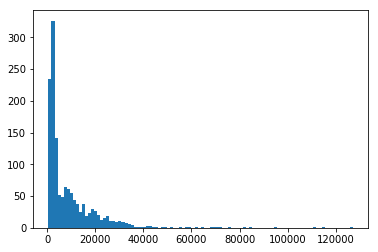

In [73]:
plt.hist(df_merged.likes, bins = 100 );

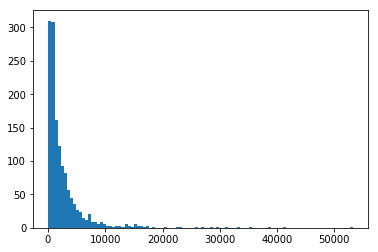

In [74]:
plt.hist(df_merged.retweet_count, bins = 100 );

In [75]:
df_merged.rating_numerator.describe()

count    1394.000000
mean       11.563845
std         7.915237
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max       144.000000
Name: rating_numerator, dtype: float64

In [76]:
#plt.hist(df_merged.rating_numerator );

In [77]:
df_merged['rating'] = df_merged.rating_numerator/df_merged.rating_denominator 

In [78]:
df_merged.rating.describe()

count    1394.000000
mean        1.096818
std         0.280898
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         7.500000
Name: rating, dtype: float64

In [79]:
df_merged = df_merged[df_merged.rating.notnull()]

## Top 3 by likes:

In [80]:
features = ['tweet_id','name','likes','text','jpg_url','retweet_count','rating_numerator','p1','p2','p3','rating']

df1 = df_merged[df_merged.jpg_url.notnull()]
top3_by_likes = df1[features].sort_values('likes',ascending=False).iloc[:3]
top3_by_likes

,tweet_id,name,likes,text,jpg_url,retweet_count,rating_numerator,p1,p2,p3,rating
305,822872901745569793,NaN,127090,Here's a super supportive puppo participating ...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,41158,13,Lakeland_terrier,Labrador_retriever,Irish_terrier,1.3
396,807106840509214720,Stephan,114665,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,53222,13,Chihuahua,Pomeranian,toy_terrier,1.3
107,866450705531457537,Jamesy,111444,This is Jamesy. He gives a kiss to every other...,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,31110,13,French_bulldog,Boston_bull,pug,1.3


In [81]:
top3_by_likes.iloc[0]

tweet_id                                           822872901745569793
name                                                              NaN
likes                                                          127090
text                Here's a super supportive puppo participating ...
jpg_url               https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
retweet_count                                                   41158
rating_numerator                                                   13
p1                                                   Lakeland_terrier
p2                                                 Labrador_retriever
p3                                                      Irish_terrier
rating                                                            1.3
Name: 305, dtype: object

In [82]:
from IPython.display import Image
from IPython.core.display import HTML 

path = top3_by_likes.iloc[0].jpg_url
Image(url= path,width = 500,height =500)


In [83]:
print('First place by people likes: ',top3_by_likes.iloc[0].p1)
top3_by_likes.iloc[0].text 

First place by people likes:  Lakeland_terrier


"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 "

In [84]:
path = top3_by_likes.iloc[1].jpg_url
Image(url= path,width = 500,height =500)


In [85]:
print('Second place by people likes: ',top3_by_likes.iloc[1].p1)
top3_by_likes.iloc[1].text 


Second place by people likes:  Chihuahua


'This is Stephan. He just wants to help. 13/10 such a good boy '

In [86]:
path = top3_by_likes.iloc[2].jpg_url
Image(url= path,width = 500,height =500)

In [87]:
print('Third place by people likes: ', top3_by_likes.iloc[2].p1)
top3_by_likes.iloc[2].text 

Third place by people likes:  French_bulldog


'This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender '

## Top3 by retweets:

In [88]:
features = ['tweet_id','name','likes','text','jpg_url','retweet_count','rating_numerator','p1','p2','p3']

df1 = df_merged[df_merged.jpg_url.notnull()]
top3_by_retweets = df1[features].sort_values('retweet_count',ascending=False).iloc[:3]
top3_by_retweets

,tweet_id,name,likes,text,jpg_url,retweet_count,rating_numerator,p1,p2,p3
396,807106840509214720,Stephan,114665,This is Stephan. He just wants to help. 13/10 ...,https://pbs.twimg.com/ext_tw_video_thumb/80710...,53222,13,Chihuahua,Pomeranian,toy_terrier
305,822872901745569793,NaN,127090,Here's a super supportive puppo participating ...,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,41158,13,Lakeland_terrier,Labrador_retriever,Irish_terrier
58,879415818425184262,Duddles,95077,This is Duddles. He did an attempt. 13/10 some...,https://pbs.twimg.com/ext_tw_video_thumb/87941...,38474,13,English_springer,Boston_bull,Cardigan


In [89]:
top3_by_retweets.iloc[1]

tweet_id                                           822872901745569793
name                                                              NaN
likes                                                          127090
text                Here's a super supportive puppo participating ...
jpg_url               https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
retweet_count                                                   41158
rating_numerator                                                   13
p1                                                   Lakeland_terrier
p2                                                 Labrador_retriever
p3                                                      Irish_terrier
Name: 305, dtype: object

In [90]:
path = top3_by_retweets.iloc[0].jpg_url
Image(url= path,width = 500,height =500)


In [91]:
print('First place by number of retweets: ',top3_by_retweets.iloc[0].p1)
top3_by_retweets.iloc[0].text 

First place by number of retweets:  Chihuahua


'This is Stephan. He just wants to help. 13/10 such a good boy '

In [92]:
path =  top3_by_retweets.iloc[1].jpg_url
Image(url= path,width = 500,height =500)


In [93]:
print('Second place by number of retweets: ',top3_by_retweets.iloc[1].p1)
top3_by_retweets.iloc[1].text 

Second place by number of retweets:  Lakeland_terrier


"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 "

In [94]:
path = top3_by_retweets.iloc[2].jpg_url
Image(url= path,width = 500,height =500)


In [95]:
print('Third place by number of retweets: ',top3_by_retweets.iloc[2].p1)
top3_by_retweets.iloc[2].text 

Third place by number of retweets:  English_springer


'This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) '

## Top 3 by  ratings(only those who have images):

In [96]:
df1 = df_merged[df_merged.jpg_url.notnull()]

In [97]:
df2 = df1.rating_numerator/df1.rating_denominator


In [98]:
df1['rating'] = pd.Series(df2.values)

In [99]:
features = ['tweet_id','name','likes','text','jpg_url','retweet_count','rating_numerator','p1','p2','p3','rating']

In [100]:

top3_by_rating = df1[features].sort_values('rating',ascending=False).iloc[:3]
top3_by_rating

,tweet_id,name,likes,text,jpg_url,retweet_count,rating_numerator,p1,p2,p3,rating
499,786709082849828864,Logan,17774,"This is Logan, the Chow who lived. He solemnly...",https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,5899,75,Pomeranian,Persian_cat,chow,7.500000
381,810984652412424192,Sam,5172,Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,1370,24,golden_retriever,Tibetan_mastiff,Labrador_retriever,3.428571
548,778027034220126208,Sophie,6350,This is Sophie. She's a Jubilant Bush Pupper. ...,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1535,27,clumber,cocker_spaniel,Lhasa,2.700000


In [101]:
top3_by_rating.iloc[0]

tweet_id                                           786709082849828864
name                                                            Logan
likes                                                           17774
text                This is Logan, the Chow who lived. He solemnly...
jpg_url               https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg
retweet_count                                                    5899
rating_numerator                                                   75
p1                                                         Pomeranian
p2                                                        Persian_cat
p3                                                               chow
rating                                                            7.5
Name: 499, dtype: object

In [102]:
print('First place by rating: ',top3_by_rating.iloc[0].p1)
top3_by_rating.iloc[0].text 

First place by rating:  Pomeranian


"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 "

In [103]:
path = top3_by_rating.iloc[0].jpg_url
Image(url= path,width = 500,height =500)

In [104]:
print('Second place by rating: ',top3_by_rating.iloc[1].p1)
top3_by_rating.iloc[1].text 

Second place by rating:  golden_retriever


'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n'

In [105]:
path = top3_by_rating.iloc[1].jpg_url
Image(url= path,width = 500,height =500)

In [106]:
print('Third place by rating: ',top3_by_rating.iloc[2].p1)
top3_by_rating.iloc[2].text 

Third place by rating:  clumber


"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back "

In [107]:
path = top3_by_rating.iloc[2].jpg_url
Image(url= path,width = 500,height =500)

## Popularity development investigation

In [108]:

df_time_count = df_merged.groupby('created_date').size()
df_time_count = df_time_count.to_frame()
type( df_time_count)


pandas.core.frame.DataFrame

In [109]:
 df_time_count = df_time_count.reset_index()

In [110]:
df_time_count = df_time_count.rename(columns={'created_date':'submission_date',0:'submitions_count'})

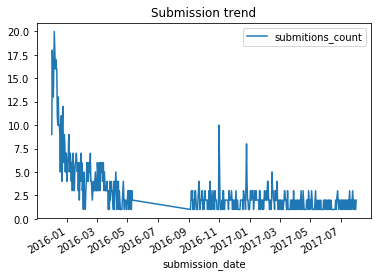

In [111]:
df_time_count.plot.line( x='submission_date', y = 'submitions_count',title = 'Submission trend' )


In [112]:
df_time_count['rolling_7_avg'] = df_time_count.submitions_count.rolling(7).mean()

<Figure size 432x288 with 0 Axes>

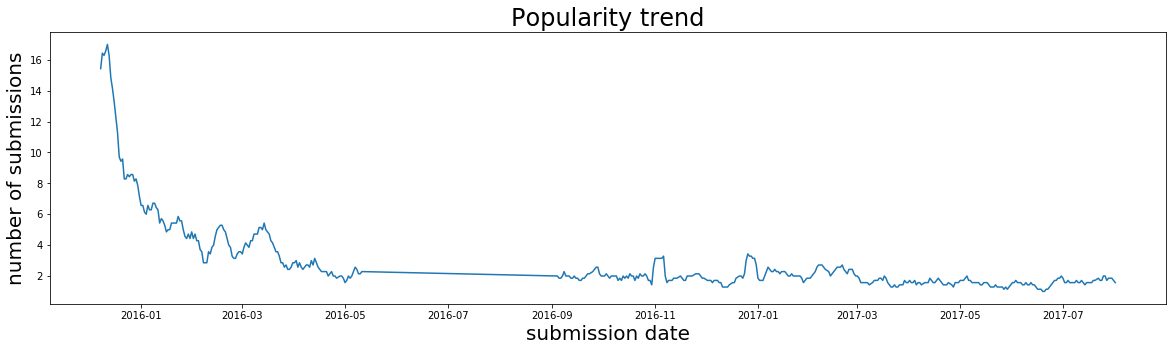

<Figure size 432x288 with 0 Axes>

In [113]:
x = df_time_count['submission_date']
y = df_time_count['rolling_7_avg']
plt.figure()
plt.figure(num = 3, figsize=(20, 5))
plt.plot(x, y)  

plt.xlabel("submission date",fontsize=20)
plt.ylabel("number of submissions",fontsize=20)
plt.title("Popularity trend",fontsize=24)

plt.show()
plt.savefig('popularity-development_weratedogs.jpg');

**Insight: While at the start many people got enthusiastic about competition and submitted lots of dog pictures, overtime it shows sharp downtrend in popularity of that dogs rating account with less and less number of images got submitted overtime. **